In [1]:
# importing necessary libraries
import torch
import torchvision
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
# hyper tuning

batch_size=100


train_dataset=torchvision.datasets.MNIST(root="./",download=False,train=True, transform=transforms.ToTensor())

test_dataset=torchvision.datasets.MNIST(root="./",download=False,train=False, transform=transforms.ToTensor())




train_loader=DataLoader(dataset=train_dataset,shuffle=True,batch_size=batch_size)
test_loader=DataLoader(dataset=test_dataset,batch_size=batch_size)


In [3]:
example=iter(train_loader)
samples,labels=example.next()
print(samples.shape,labels.shape)  

torch.Size([100, 1, 28, 28]) torch.Size([100])


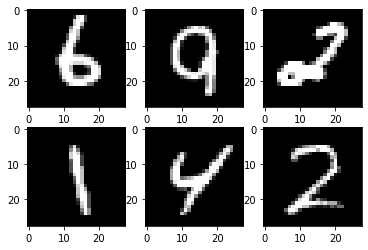

In [4]:
# samples images of handwritten digits
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i+10][0],cmap="gray")
plt.show()

In [5]:
class Neural_net(nn.Module):
    def __init__(self,input_size,hidden_size,output_size):
        super(Neural_net,self).__init__()
        self.fc1=nn.Linear(input_size,hidden_size)
        self.relu=nn.ReLU()
        self.fc2=nn.Linear(hidden_size,output_size)
        
        
    def forward(self,x):
        x=self.relu(self.fc1(x))
        x=self.fc2(x)
        return x 
    
        

In [12]:
input_size=28*28*1   #input layer
hidden_size=100  #hidden layer
output_size=10    # output layer

learning_rate=0.01
num_epoch=2

obj=Neural_net(input_size,hidden_size,output_size)

criterion=nn.CrossEntropyLoss()     # log-loss 

optimiser=torch.optim.Adam(obj.parameters(),lr=learning_rate)

for epoch in range(num_epoch):
    for i,(images,labels) in enumerate(train_loader):
        
        images=images.reshape(-1,28*28)
        labels=labels
        
        
        output=obj.forward(images)

        
        loss=criterion(output,labels)
        
        optimiser.zero_grad()
        
        loss.backward()
        optimiser.step()
        
        if (i+1)%100==0:
            print(f"EPOCH[{i+1}/{epoch+1}]  LOSS {loss.item()}")

EPOCH[100/1]  LOSS 0.3908576965332031
EPOCH[200/1]  LOSS 0.16198016703128815
EPOCH[300/1]  LOSS 0.14827096462249756
EPOCH[400/1]  LOSS 0.11036311835050583
EPOCH[500/1]  LOSS 0.221829354763031
EPOCH[600/1]  LOSS 0.08653701841831207
EPOCH[100/2]  LOSS 0.1698981523513794
EPOCH[200/2]  LOSS 0.14314892888069153
EPOCH[300/2]  LOSS 0.08775147795677185
EPOCH[400/2]  LOSS 0.178132101893425
EPOCH[500/2]  LOSS 0.24953345954418182
EPOCH[600/2]  LOSS 0.08841719478368759


In [13]:
obj.eval()        #evaluating the model

correct=0
total=0

for images,labels in test_loader:
    
    images=images.reshape(-1,28*28) #.to(device)
    labels=labels  #.to(device)
    
    output=obj.forward(images)
    
    _,predict=torch.max(output,1)
    
    total+=labels.shape[0]
    
    correct+=(predict==labels).sum().item()
    
print("THE ACCURACY IS  ",correct*100/total)

THE ACCURACY IS   96.7


In [25]:
x_test=DataLoader(dataset=train_dataset,shuffle=True,batch_size=100)

In [38]:
test=iter(x_test)
img,labels=test.next()

In [73]:
def prediction(index):
    
    output=obj.forward(img[index].view(-1,28*28*1))
    
    _,predicted=torch.max(torch.softmax(output,1),1)
    
    
    plt.imshow(img[index][0],cmap="gray")
    plt.title(f"TRUTH IS     {labels[index]}")
    plt.xlabel(f"PREDICTED  IS  {predicted.item()}")
#     plt.axis("off")

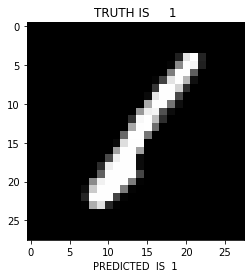

In [74]:
prediction(0)

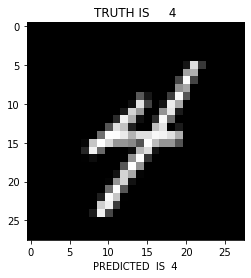

In [75]:
prediction(88)